In [3]:
__author__ = 'ORI'

from matplotlib.collections import LineCollection

import numpy as np
import scipy.io
import sys, os
import matplotlib.pyplot as plt
# I should learn how to load libraries in a more elegant way
ABC_list =   ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','_','.','!','<']




color_dictionary = dict()
for letter_i, letter in enumerate(ABC_list):
    print letter_i
    #     red (fRyGk<)
    if letter in list('fRyGk<'.lower()):
        color_dictionary[letter_i+1] = 0
    #     blue (iSwc_N)
    if letter in list('iSwc_N'.lower()):
        color_dictionary[letter_i+1] = 1
    #     green (TBMqAH), 
    if letter in list('TBMqAH'.lower()):
        color_dictionary[letter_i+1] = 2
    #     black (LdvOz.).
    if letter in list('LdvOz.'.lower()):
        color_dictionary[letter_i+1] = 3
    #     white (pJUX!E)
    if letter in list('pJUX!E'.lower()):
        color_dictionary[letter_i+1] = 4
    
    
print color_dictionary[27]

sys.path.append(r'C:\Users\ORI\Documents\IDC-non-sync\Thesis\PythonApplication1\OriKerasExtension')
#import OriKerasExtension
import ThesisHelper
#reload(OriKerasExtension)
reload(ThesisHelper)
from   ThesisHelper import LoadSingleSubjectPython, readCompleteMatFile, ExtractDataVer4
import P300Prediction
reload(P300Prediction)
from P300Prediction import accuracy_by_repetition, create_target_table


sys.path.append(r'C:\Users\ORI\Documents\IDC-non-sync\Thesis\PythonApplication1\OriKerasExtension')
#import OriKerasExtension
import ThesisHelper
from sklearn.metrics import roc_curve, auc, roc_auc_score
import P300Prediction
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from scipy import stats
from sklearn.cross_validation import StratifiedShuffleSplit

#reload(OriKerasExtension)
reload(ThesisHelper)
from ThesisHelper import LoadSingleSubjectPython, readCompleteMatFile, ExtractDataVer4
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

reload(P300Prediction)
from P300Prediction import accuracy_by_repetition, create_target_table


# [all_target, all_non_target] = LoadSingleSubjectPython(r'C:\Users\ORI\Documents\Thesis\dataset_all\RSVP_Color116msVPfat.mat')



# all_samples = np.vstack((all_target,all_non_target))


# '''
# Create the tagging column
# '''
# all_tags = np.vstack((np.ones((all_target.shape[0],1)), np.zeros((all_non_target.shape[0],1))))



# from OriKerasExtension.OriKerasExtension import DebugLSTM
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.regularizers import l2
from  keras.regularizers import WeightRegularizer

'''
define the neural network model:
'''


def create_compile_cnn_model():
    model = Sequential()

    number_of_time_stamps = 20
    number_of_out_channels = 10
    number_of_in_channels = 55
    length_of_time_axe_mask = 10

    model.add(Convolution2D(nb_filter=10,
                            nb_col=number_of_out_channels,
                            nb_row=1,
                            input_shape=(1, number_of_time_stamps, number_of_in_channels),
                            border_mode='same',
                            init='glorot_normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, number_of_in_channels)))
    model.add(
        Convolution2D(nb_filter=number_of_out_channels, nb_row=6, nb_col=1, border_mode='same', init='glorot_normal'))
    model.add(MaxPooling2D(pool_size=(20, 1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')
    return model

def create_compile_lstm_model():

    '''
    define the neural network model:
    '''
    model_lstm = Sequential()

    model_lstm.add(LSTM(input_dim=55, output_dim=20,return_sequences=True))
    model_lstm.add(Dropout(0.3))
    model_lstm.add(LSTM(input_dim=20, output_dim=20,return_sequences=False))
    model_lstm.add(Dense(2, W_regularizer=l2(0.06)))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model_lstm


def create_compile_lstm_model_letter():

    '''
    define the neural network model:
    '''
    model_lstm = Sequential()

    model_lstm.add(LSTM(input_dim=55, output_dim=20,return_sequences=True))
    model_lstm.add(Dropout(0.01))
    model_lstm.add(LSTM(input_dim=20, output_dim=20,return_sequences=False))
#     model_lstm.add(Dropout(0.01))
#     model_lstm.add(LSTM(input_dim=20, output_dim=20,return_sequences=False))
    model_lstm.add(Dense(5, W_regularizer=l2(0.006)))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model_lstm



def create_compile_dense_model():

    '''
    define the neural network model:
    '''
    model_lstm = Sequential()
    model_lstm.add(keras.layers.core.Flatten(input_shape=(55,100)))
    model_lstm.add(Dense(input_dim=55*100, output_dim=30 , W_regularizer=l2(0.06)))
    model_lstm.add(Activation('tanh'))
    model_lstm.add(Dense(2))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model_lstm

def create_small_compile_dense_model():

    '''
    define the neural network model:
    '''
    model_lstm = Sequential()
    model_lstm.add(keras.layers.core.Flatten(input_shape=(55,25)))
    model_lstm.add(Dense(input_dim=55*25, output_dim=20 ))
    model_lstm.add(Dropout(0.3))
    model_lstm.add(Activation('tanh'))
    model_lstm.add(Dense(output_dim=20 , W_regularizer=l2(0.06)))
    model_lstm.add(Activation('tanh'))
    model_lstm.add(Dense(2))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model_lstm

def create_small_compile_dense_model_color():

    '''
    define the neural network model:
    '''
    model_lstm = Sequential()
    model_lstm.add(keras.layers.core.Flatten(input_shape=(55,25)))
    model_lstm.add(Dense(input_dim=55*25, output_dim=20 ))
    model_lstm.add(Dropout(0.3))
    model_lstm.add(Activation('tanh'))
    model_lstm.add(Dense(output_dim=20 , W_regularizer=l2(0.06)))
    model_lstm.add(Activation('tanh'))
    model_lstm.add(Dense(5))
    model_lstm.add(Activation('softmax'))
    model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    return model_lstm



# def down_sample_data()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1


In [4]:
def create_evaluation_data(gcd_res, down_samples_param):
#     gcd_res = readCompleteMatFile(file_name)
    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'], gcd_res['target'],
                                    -200, 800)
    # print  data_for_eval

    temp_data_for_eval = downsample_data(data_for_eval[0], data_for_eval[0].shape[1], down_samples_param)

    test_data_gcd, test_target_gcd = temp_data_for_eval[gcd_res['train_mode'] != 1], data_for_eval[1][
        gcd_res['train_mode'] != 1]
    return test_data_gcd, test_target_gcd


def downsample_data(data, number_of_original_samples, down_samples_param):


    new_number_of_time_stamps = number_of_original_samples / down_samples_param


    # print  data_for_eval
    temp_data_for_eval = np.zeros((data.shape[0], new_number_of_time_stamps, data.shape[2]))

    for new_i, i in enumerate(range(0, number_of_original_samples, down_samples_param)):
        temp_data_for_eval[:, new_i, :] = np.mean(data[:, range(i, (i + down_samples_param)), :], axis=1)
    return temp_data_for_eval

def get_color_from_stimuli(stimulus_vetor, color_dictionary):
    return [color_dictionary[x] for x in stimulus_vetor]
#     red (fRyGk<), 
#     white (pJUX!E),
#     blue (iSwc_N), 
#     green (TBMqAH), 
#     black (LdvOz.).
    pass

def create_train_data(gcd_res, down_samples_param):
    all_positive_train = []
    all_negative_train = []

    last_time_stamp = 800
    fist_time_stamp = -200


    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)
    
    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0],data_for_eval[0].shape[1], down_samples_param)

    all_data = temp_data_for_eval[np.all([gcd_res['train_mode'] != 3], axis=0)]
    

    
    categorical_tags = to_categorical(get_color_from_stimuli(gcd_res['stimulus'][gcd_res['train_mode'] != 3], color_dictionary))
    indexes = range(len(categorical_tags))
    print "len(categorical_tags) {0}".format(len(categorical_tags))

    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags

def create_letter_test_data(gcd_res, down_samples_param):
    all_positive_train = []
    all_negative_train = []

    last_time_stamp = 800
    fist_time_stamp = -200


    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)
    
    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0],data_for_eval[0].shape[1], down_samples_param)

    all_data = temp_data_for_eval[np.all([gcd_res['train_mode'] == 3], axis=0)]
    
    categorical_tags = to_categorical(get_color_from_stimuli(gcd_res['stimulus'][gcd_res['train_mode'] == 3], color_dictionary))
    
#     categorical_tags = to_categorical(gcd_res['stimulus'][gcd_res['train_mode'] == 3])
    indexes = range(len(categorical_tags))
    print "len(categorical_tags) {0}".format(len(categorical_tags))

    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags


def create_data_for_compare_by_repetition(file_name):
    gcd_res = readCompleteMatFile(file_name)
    sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] != 1],
                       train_block=gcd_res['train_block'][gcd_res['train_mode'] != 1],
                       stimulus=gcd_res['stimulus'][gcd_res['train_mode'] != 1])
    return sub_gcd_res

#shuffeled_samples, suffule_tags = create_train_data(file_name=None, down_samples_param=5)
# shuffeled_samples, suffule_tags = create_train_data(file_name=None, down_samples_param=20)
# original_weights_mlp = model_mlp.get_weights()

data_set_locations = ["RSVP_Color116msVPicr.mat",
                      "RSVP_Color116msVPpia.mat",
                      "RSVP_Color116msVPfat.mat",
                      "RSVP_Color116msVPgcb.mat",
                      "RSVP_Color116msVPgcc.mat",
                      "RSVP_Color116msVPgcd.mat",
                      "RSVP_Color116msVPgcf.mat",
                      "RSVP_Color116msVPgcg.mat",
                      "RSVP_Color116msVPgch.mat",
                      "RSVP_Color116msVPiay.mat",
                      "RSVP_Color116msVPicn.mat"];

# data_set_locations = ["RSVP_Color116msVPgcd.mat"]

# results = []

# for subject_name in data_set_locations:
#     file_name = r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(subject_name)
#     gcd_res = readCompleteMatFile(file_name)

def print_true_vs_predict(true_val, predicted_val):
    import matplotlib.cm as cm        
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(true_val[:,1].reshape(-1,30), cmap=cm.Greys_r, interpolation='none', aspect='auto')
    plt.subplot(1,2,2)
    plt.imshow(predicted_val[:,1].reshape(-1,30), cmap=cm.Greys_r, interpolation='none', aspect='auto')
    plt.show()

# def calculate_proximity_to_target()

In [3]:
gcd_res = readCompleteMatFile(r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format("RSVP_Color116msVPicr.mat"))
gcd_res.keys()
# to_categorical(gcd_res['stimulus'])
temp =to_categorical(get_color_from_stimuli(gcd_res['stimulus'][gcd_res['train_mode'] != 3], color_dictionary))
print temp.shape

# create_train_data(gcd_res,8)

(13200L, 5L)


In [5]:
model = create_compile_lstm_model_letter()
model_mlp = create_small_compile_dense_model_color()
original_weights = model.get_weights()
original_weights_mlp = model_mlp.get_weights()

DEBUG: nvcc STDOUT mod.cu
   Creating library c:/tmp/theano.NOBACKUP/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpfnzrzg/03591e6f7304156e3b956ee04cd01af3.lib and object c:/tmp/theano.NOBACKUP/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpfnzrzg/03591e6f7304156e3b956ee04cd01af3.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library c:/tmp/theano.NOBACKUP/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpx6oyes/1f77676baa319f8544e1429675dadf3e.lib and object c:/tmp/theano.NOBACKUP/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpx6oyes/1f77676baa319f8544e1429675dadf3e.exp

DEBUG: nvcc STDOUT mod.cu
   Creating library c:/tmp/theano.NOBACKUP/compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64/tmpee3wrd/75d98f07bb2a15642840ff446e8c22bf.lib and object c:/tmp/thean

In [ ]:
%matplotlib inline
model.set_weights(original_weights)
model_mlp.set_weights(original_weights_mlp)
results = []
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('val_loss'))
        self.accuracies.append(logs.get('val_acc'))

history = LossHistory()
history_mlp = LossHistory()
all_history = []
for i in range(10):
    for subject_name in data_set_locations:
        file_name = r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(subject_name)
        print "subject_name : {0}".format(subject_name)
        gcd_res = readCompleteMatFile(file_name)
        subject_results = dict()



        down_sample_param = 8
        train_data, train_tags = create_train_data(gcd_res, down_samples_param=down_sample_param)
        print train_tags.shape
        shuffeled_samples, suffule_tags = shuffle(train_data, train_tags, random_state=0)
        test_data, test_tags = create_letter_test_data(gcd_res, down_samples_param=down_sample_param)

        train_history = model.fit(stats.zscore(shuffeled_samples, axis=1), suffule_tags,
                  nb_epoch=2, show_accuracy=True, verbose=1,validation_data=(stats.zscore(test_data, axis=1), test_tags),
                                 callbacks=[history])
        train_history_mlp = model_mlp.fit(stats.zscore(shuffeled_samples, axis=1), suffule_tags,
                  nb_epoch=2, show_accuracy=True, verbose=1,validation_data=(stats.zscore(test_data, axis=1), test_tags), 
                                         callbacks=[history_mlp])
        print history.accuracies
#         print model.evaluate(stats.zscore(test_data, axis=1), test_tags, show_accuracy=True)
        all_history.append([subject_name, history, history_mlp])

subject_name : RSVP_Color116msVPicr.mat
(18600L, 200L, 55L)
len(categorical_tags) 13200
(13200L, 5L)
(18600L, 200L, 55L)
len(categorical_tags) 5400
Train on 13200 samples, validate on 5400 samples
Epoch 1/2
13200/13200 [==============================] - 11s - loss: 1.6627 - acc: 0.2215 - val_loss: 1.5972 - val_acc: 0.2422
Epoch 2/2
13200/13200 [==============================] - 11s - loss: 1.6235 - acc: 0.2621 - val_loss: 1.5798 - val_acc: 0.2659
Train on 13200 samples, validate on 5400 samples
Epoch 1/2
13200/13200 [==============================] - 1s - loss: 2.1609 - acc: 0.5122 - val_loss: 0.9196 - val_acc: 0.6739
Epoch 2/2
13200/13200 [==============================] - 1s - loss: 1.3092 - acc: 0.7067 - val_loss: 0.7212 - val_acc: 0.7443
[0.24222222222222223, 0.2659259259259259]
subject_name : RSVP_Color116msVPpia.mat
(20700L, 200L, 55L)
len(categorical_tags) 13200
(13200L, 5L)
(20700L, 200L, 55L)
len(categorical_tags) 7500
Train on 13200 samples, validate on 7500 samples
Epoch 1/2

In [19]:
[x for x in all_history]

[['RSVP_Color116msVPicr.mat',
 ['RSVP_Color116msVPpia.mat',
 ['RSVP_Color116msVPfat.mat',
 ['RSVP_Color116msVPgcb.mat',
 ['RSVP_Color116msVPgcc.mat',
 ['RSVP_Color116msVPgcd.mat',
 ['RSVP_Color116msVPgcf.mat',
 ['RSVP_Color116msVPgcg.mat',
 ['RSVP_Color116msVPgch.mat',
 ['RSVP_Color116msVPiay.mat',
 ['RSVP_Color116msVPicn.mat',
 ['RSVP_Color116msVPicr.mat',
 ['RSVP_Color116msVPpia.mat',
 ['RSVP_Color116msVPfat.mat',
 ['RSVP_Color116msVPgcb.mat',
 ['RSVP_Color116msVPgcc.mat',
 ['RSVP_Color116msVPgcd.mat',
 ['RSVP_Color116msVPgcf.mat',
 ['RSVP_Color116msVPgcg.mat',
 ['RSVP_Color116msVPgch.mat',
 ['RSVP_Color116msVPiay.mat',
 ['RSVP_Color116msVPicn.mat',
 ['RSVP_Color116msVPicr.mat',
 ['RSVP_Color116msVPpia.mat',
 ['RSVP_Color116msVPfat.mat',
 ['RSVP_Color116msVPgcb.mat',
 ['RSVP_Color116msVPgcc.mat',
 ['RSVP_Color116msVPgcd.mat',
 ['RSVP_Color116msVPgcf.mat',
 ['RSVP_Color116msVPgcg.mat',
 ['RSVP_Color116msVPgch.mat',
 ['RSVP_Color116msVPiay.mat',
 ['RSVP_Color116msVPicn.mat',
 ['RSVP_Co

In [93]:
import theano
precalssify_layer = theano.function([model.get_input(train=False)], model.layers[-5].get_output(train=False))

AttributeError: 'TSNE' object has no attribute 'get_input'

In [38]:
def create_p300_test_data(gcd_res, down_samples_param):
    all_positive_train = []
    all_negative_train = []

    last_time_stamp = 800
    fist_time_stamp = -200


    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)
    
    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0],data_for_eval[0].shape[1], down_samples_param)

    all_data = temp_data_for_eval[np.all([gcd_res['train_mode'] == 3], axis=0)]
    

    shuffeled_samples, suffule_tags = (all_data, gcd_res['target'][gcd_res['train_mode'] == 3])
    return shuffeled_samples, suffule_tags

In [91]:
test_data, test_tags = create_letter_test_data(gcd_res, 8)
tags_from_cate = np.argmax(test_tags, axis=1)
sub_layer_res = precalssify_layer(stats.zscore(test_data, axis=1).astype(np.float32))[0:2400]

from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
# np.set_printoptions(suppress=True)
transformed = model.fit_transform(sub_layer_res, ) 
# plt.scatter(transformed[[test_tags == 1][0:400],0],transformed[[test_tags == 1][0:400],1], color="r")
# plt.scatter(transformed[[test_tags[0:400] == 0],0],transformed[[test_tags[0:400] == 0],1], color="b")
# plt.scatter(transformed[:,0],transformed[:,1], color="b")

(19200L, 200L, 55L)
len(categorical_tags) 6000


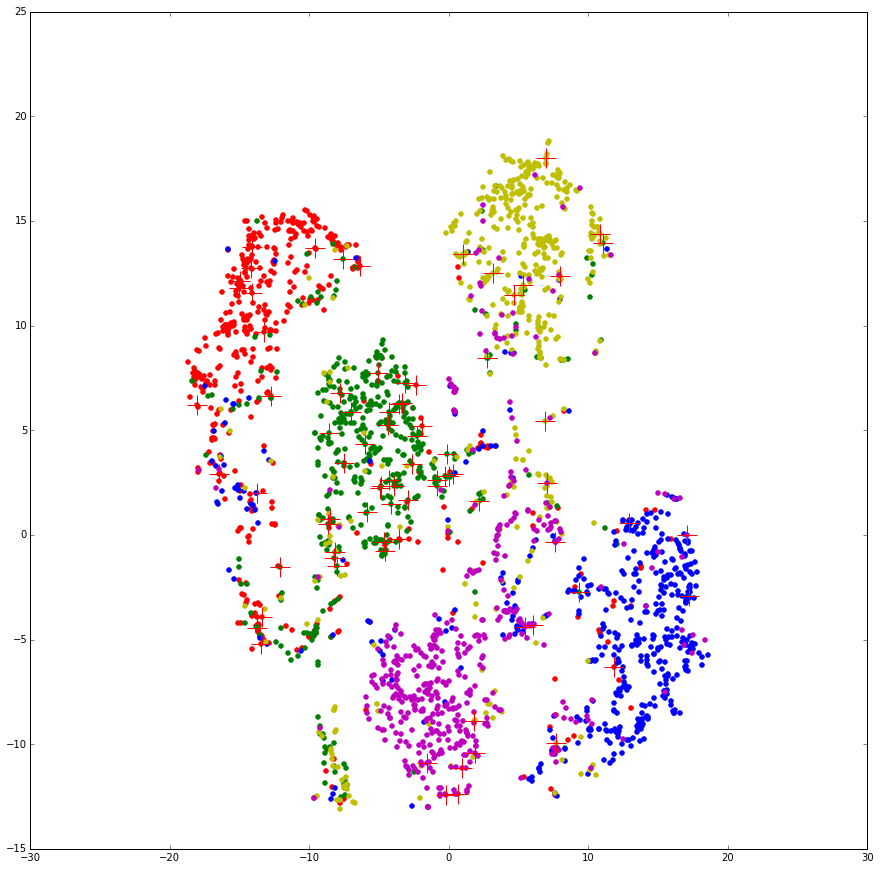

In [92]:
plt.figure(figsize=(15,15))
max_sze = 2400
idx_of_target = gcd_res['target'][np.all([gcd_res['train_mode'] == 3], axis=0)][0:max_sze]

plt.scatter(transformed[tags_from_cate[0:max_sze] == 0,0],transformed[tags_from_cate[0:max_sze] == 0,1], color="r")
plt.scatter(transformed[tags_from_cate[0:max_sze] == 1,0],transformed[tags_from_cate[0:max_sze] == 1,1], color="g")
plt.scatter(transformed[tags_from_cate[0:max_sze] == 2,0],transformed[tags_from_cate[0:max_sze] == 2,1], color="b")
plt.scatter(transformed[tags_from_cate[0:max_sze] == 3,0],transformed[tags_from_cate[0:max_sze] == 3,1], color="y")
plt.scatter(transformed[tags_from_cate[0:max_sze] == 4,0],transformed[tags_from_cate[0:max_sze] == 4,1], color="m")
plt.scatter(transformed[idx_of_target == 1,0],transformed[idx_of_target == 1,1], color="r", marker='+', s=400)

# gcd_res['target'][gcd_res['train_mode'] == 3]
# print test_tags[0:400] == 1
# print transformed[[test_tags[0:400] == 0],0].shape
plt.show()

In [ ]:
model.save_weights('c:\tmp\letters_model.h5')

In [12]:
from sklearn.metrics import confusion_matrix
validation_data=(stats.zscore(test_data, axis=1), test_tags)
prediction_res = model.predict(stats.zscore(test_data, axis=1))
print to_categorical(prediction_res.max(axis=1)).shape
print test_tags.argmax(axis=1).shape
print prediction_res.argmax(axis=1)
confusion_matrix(test_tags.argmax(axis=1),prediction_res.argmax(axis=1))

(5400L, 1L)
(5400L,)
[0 4 1 ..., 4 1 3]


array([[863,  57,  62,  63,  35],
       [ 67, 858,  41,  80,  34],
       [ 70,  32, 872,  38,  68],
       [ 40,  84,  34, 845,  77],
       [ 41,  29,  77,  74, 859]])

In [14]:
import pandas as pd
confusion_matrix(test_tags.argmax(axis=1), prediction_res.argmax(axis=1))
ABC_list = ['reb', 'blue', 'green', 'black', 'white']
df = pd.DataFrame(confusion_matrix(test_tags.argmax(axis=1), prediction_res.argmax(axis=1)), columns=ABC_list, index=ABC_list)
# df.set_index(ABC_list)
df.to_excel(r'c:\temp\letters_colors.xls')

In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(ABC_list))
    plt.xticks(tick_marks, ABC_list, rotation=45)
    plt.yticks(tick_marks, ABC_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

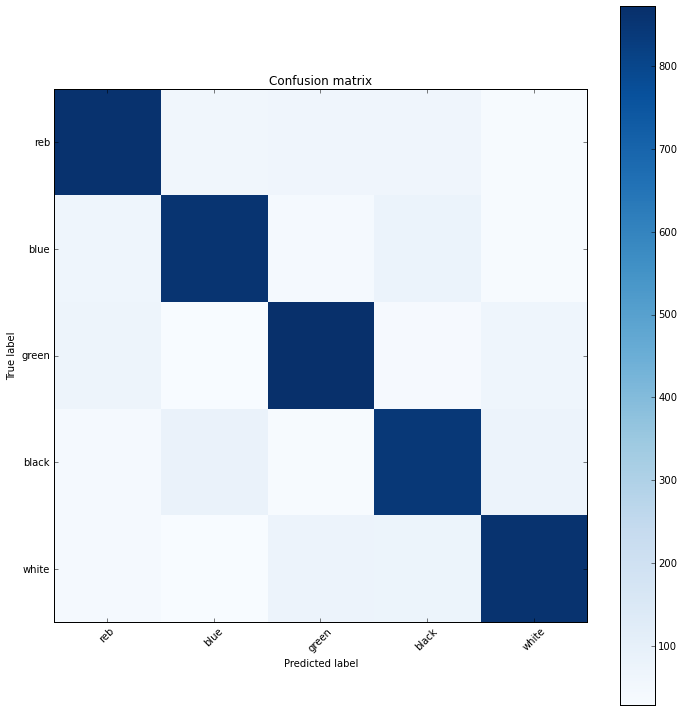

In [16]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion_matrix(test_tags.argmax(axis=1), prediction_res.argmax(axis=1)))

In [ ]:
-.!<